<a href="https://colab.research.google.com/github/Dei-gratia/Machine-Learning-Projects/blob/main/Machine%20Learning%20%26%20Deep%20Learning%20Projects/CNN_for_Binary_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install the dependences
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing the dataset

In [2]:
#configure the path for kaggle .json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
#import the dataset from kaggle
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 92% 201M/218M [00:02<00:00, 67.7MB/s]
100% 218M/218M [00:02<00:00, 89.8MB/s]


In [4]:
# unzipping the dataset
! unzip -q /content/cat-and-dog.zip

# Building the model

In [5]:
#initialise the CNN
model = tf.keras.models.Sequential()

#first CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))

#maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

#second CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))

#maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

#flattening layer
model.add(tf.keras.layers.Flatten())

#dropout layer
model.add(tf.keras.layers.Dropout(0.4))

#fully connected layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

#output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [6]:
#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

# Fitting CNN to images

In [7]:
#training and test data paths
training_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [8]:
#rescale the images
datagen = ImageDataGenerator(rescale=1./255)

training_set = datagen.flow_from_directory(directory=training_data_dir, target_size=(32, 32), classes=['dogs', 'cats'], class_mode = 'binary', batch_size = 20)

test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32, 32), classes=['dogs', 'cats'], class_mode = 'binary', batch_size = 20)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [9]:
len(training_set), len(test_set)

(401, 102)

In [10]:
test_set.batch_size

20

In [11]:
history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102)

Epoch 1/20


<ipython-input-11-2b34cd491ee1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102)


401/401 [==============================] - 20s 34ms/step - loss: 0.6713 - accuracy: 0.5840 - val_loss: 0.6407 - val_accuracy: 0.6332
Epoch 2/20
401/401 [==============================] - 13s 33ms/step - loss: 0.6055 - accuracy: 0.6761 - val_loss: 0.5660 - val_accuracy: 0.7217
Epoch 3/20
401/401 [==============================] - 13s 33ms/step - loss: 0.5647 - accuracy: 0.7056 - val_loss: 0.5275 - val_accuracy: 0.7375
Epoch 4/20
401/401 [==============================] - 13s 33ms/step - loss: 0.5266 - accuracy: 0.7319 - val_loss: 0.5316 - val_accuracy: 0.7370
Epoch 5/20
401/401 [==============================] - 13s 33ms/step - loss: 0.5058 - accuracy: 0.7459 - val_loss: 0.5223 - val_accuracy: 0.7528
Epoch 6/20
401/401 [==============================] - 13s 33ms/step - loss: 0.4789 - accuracy: 0.7658 - val_loss: 0.5156 - val_accuracy: 0.7543
Epoch 7/20
401/401 [==============================] - 13s 33ms/step - loss: 0.4478 - accuracy: 0.7855 - val_loss: 0.4921 - val_accuracy: 0.7716
Epo

# Plotting the lerning curve

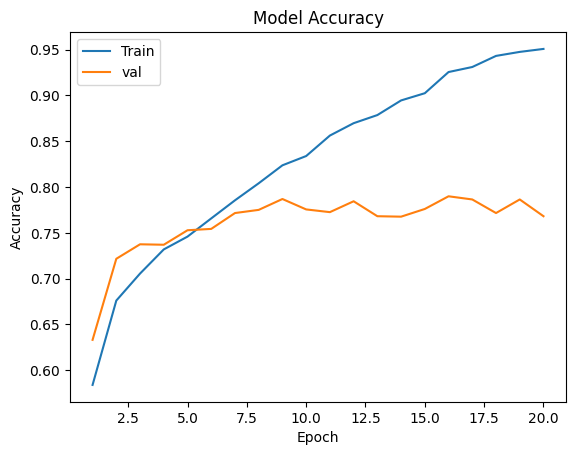

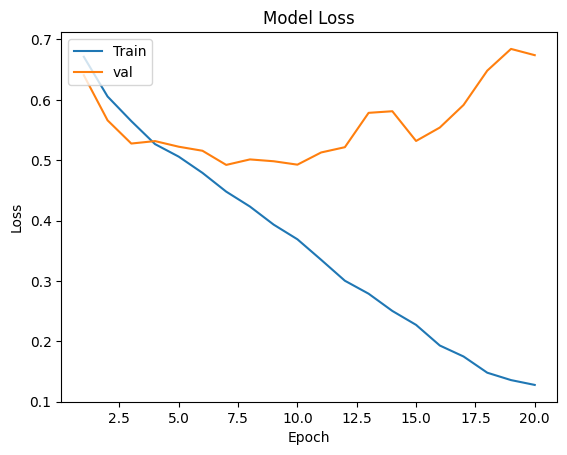

In [14]:

def learning_curve(history, epoch):
  #training vs validation accuracy
  epoch_range = range(1, epoch+1 )
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  #training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

learning_curve(history, 20)